### 1. Initialize project environemnt and create a DQN based agent

In [1]:
from unityagents import UnityEnvironment
## Create environment
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
# get environment info
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

In [3]:
from dqn_agent import Agent
## Create  DQN Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

In [4]:
from collections import deque
import torch
import random
import numpy as np

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    scores_mean = []  # list the means of the window scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset(train_mode=True)[brain_name].vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # pass action into environment
            next_state = env_info.vector_observations[0]   # get next state from updated environment
            reward = env_info.rewards[0]                   # get reward from updated environment
            done = env_info.local_done[0]                  # get info whether episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        scores_mean.append(np.mean(scores_window))  # save most recent mean score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, scores_mean[-1]), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, scores_mean[-1]))
        if scores_mean[-1]>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, scores_mean[-1]))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores, scores_mean

### 2. Train the agent and store trained model weights into checkpoint.pth file.

FYI: Instead of training the agent from sracth to run in project environment, it is possible to load the stored model weights of already trained agent from please skip steps 2 and 3 and jump directly to step 4.

In [12]:
## Train the Agent
scores, mean = dqn(n_episodes=1000, max_t=1000, eps_start=0.95, eps_end=0.01, eps_decay=0.993)

Episode 100	Average Score: 3.29
Episode 200	Average Score: 9.12
Episode 300	Average Score: 11.51
Episode 400	Average Score: 12.88
Episode 412	Average Score: 13.04
Environment solved in 412 episodes!	Average Score: 13.04


### 3. Visualize results of agent's training

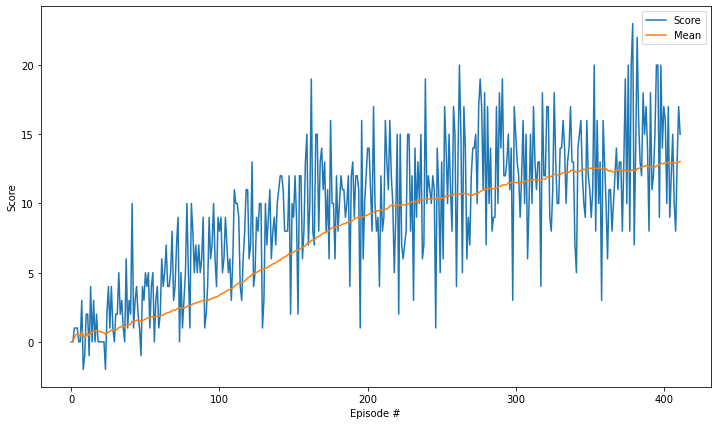

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
## Plot the scores
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(mean)), mean)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(('Score', 'Mean'))

plt.show()

### 4. Run the agent with pretrained model weights

Once this cell is executed, a Unity window with loaded project environemnt should pop up where the trained agent can be observed in action, as it moves through the environment. The agent's 'experience' is loaded from stored 'checkpoint.pth' file. This file contains the weights of the agent's neural netowrk model learned during training phase, therefore no need to train the agent every time from scratch.

In [15]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth')) # load stored weights of trained agent's model
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]        # pass action into environment
    next_state = env_info.vector_observations[0]   # get next state from updated environment
    reward = env_info.rewards[0]                   # get reward from updated environment
    done = env_info.local_done[0]                  # get info whether episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 18.0


After agent is finished, the Unity window with project environment can be closed

In [ ]:
env.close()